# **Proyek Akhir: Membuat Model Sistem Rekomendasi**

---

## Dicoding Submission
## Machine Learning Terapan

---

Kriteria submission:
- Project merupakan hasil pekerjaan sendiri.
- Project belum pernah digunakan untuk submission kelas Machine Learning di Dicoding dan belum pernah dipublikasikan di platform manapun.
- Dataset yang dipakai bebas, asal bisa digunakan untuk membuat sistem rekomendasi.
- Memberikan **dokumentasi** menggunakan **text cell** pada notebook (.ipynb) untuk menjelaskan **setiap tahapan proyek**.
- Menentukan solusi permasalahan dengan memilih pendekatan berikut:
  - Content-based Filtering
  - Collaborative Filtering
- Membuat draf laporan proyek machine learning yang menjelaskan alur proyek Anda mulai dari project overview, business understanding, data understanding, data preparation, modeling, hingga tahap evaluasi. Ketentuan draf laporan proyek machine learning dapat Anda lihat pada sub modul berikutnya tentang **Detail Laporan**.

---

Saran dan Tips:
- Menerapkan **Rubrik/Kriteria Penilaian (Tambahan)** untuk mendapatkan skala penilaian (bintang) yang lebih tinggi.
- Anda dapat memilih salah satu proyek dari domain (namun tidak terbatas pada daftar) berikut:
  - Rekomendasi film
  - Rekomendasi buku
  - Rekomendasi musik
  - Rekomendasi video
  - Rekomendasi produk 
  - Rekomendasi artikel
  - Rekomendasi berita
  - dsb.

---

- **Bintang 3** : Semua ketentuan terpenuhi, penulisan kode, dan laporan cukup baik.
- **Bintang 4** : Semua ketentuan terpenuhi, menerapkan minimal tiga (3) **Rubrik Penilaian (Tambahan)** pada laporan.
- **Bintang 5** : Semua ketentuan terpenuhi, menerapkan seluruh (6) **Rubrik Penilaian Tambahan** pada laporan.

---

# Data Diri

Nama: Andrew Benedictus Jamesie  
E-mail: andrewbjamesie@yahoo.com  

---
---

Dataset: [(Kaggle) Book Recommendation Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset)

* [(Kaggle) Movie Recommendation System](https://www.kaggle.com/datasets/dev0914sharma/dataset)

References:

[(GitHub) Contoh Format Laporan Proyek Machine Learning](https://github.com/dicodingacademy/contoh-laporan-mlt/blob/main/format_laporan_submission_2.md)


[(GitHub) Proyek Akhir Machine Learning Terapan - Indah](https://github.com/IndahDs/dicoding-machine-learning-developer/blob/main/MLT_2/MLT_Proyek_Submission_2.ipynb)


[(Kaggle) Book Recommendation - Dicoding](https://www.kaggle.com/code/farelarden/book-recommendation-dicoding)


[(GitHub) Sistem Rekomendasi: Rekomendasi Aplikasi untuk Pengguna di Google Play Store](https://github.com/fahmij8/ML-Exercise/blob/main/MLT-2/MLT_Proyek_Submission_2.ipynb)


[(Dicoding) Kenapa Hasil Rekomendasiya Berulang?](https://www.dicoding.com/academies/319/discussions/142012)

[(Colab) RekomendasiBuah.ipynb](https://colab.research.google.com/drive/10NCdwaAFVTWNUlPC32PVYIHf-UOAhPo5)


[(Dicoding) Error saat Training pada Submission Akhir](https://www.dicoding.com/academies/319/discussions/136272)

[(Colab) Buku.ipynb](https://colab.research.google.com/drive/1FyBf5ANS3NmxXM39Mh6_yXijgYL4AYKT)

---
---

# **1. *Library Import***

*Library* [`os`](https://docs.python.org/3/library/os.html) untuk memproses *function* dari *operating system*. `os.environ` untuk membaca *username* dan *key* [Kaggle](https://kaggle.com).

*Library* [`numpy`](https://numpy.org) untuk melakukan pemrosesan matematis berupa himpunan, *array*, matriks multidimensi, dan vektorisasi.

*Library* [`pandas`](https://pandas.pydata.org) untuk melakukan pemrosesan, analisis dan manipulasi data.

*Library* [`tensorflow`](https://www.tensorflow.org) untuk melakukan pelatihan *machine learning* dan *neural networks*.

*Library* [`sklearn`](https://scikit-learn.org) untuk melakukan pemrosesan *machine learning* dan *data analysis*.

*Library* [`seaborn`](https://seaborn.pydata.org) untuk membuat visualisasi data yang berbasis `matplotlib`.

*Library* [`matplotlib`](https://matplotlib.org) untuk melakukan visualisasi menggunakan *plotting*.

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import RootMeanSquaredError

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import seaborn as sns
import matplotlib.pyplot as plt

# **2. *Data Loading***

## 2.1 *Environment and Kaggle Credential*

Mengatur *environment* `operating system` [Colab](https://colab.research.google.com 'Google Colaboratory') dengan variabel `KAGGLE_USERNAME` dan variabel `KAGGLE_KEY` untuk menghubungkan platform [Kaggle](https://kaggle.com 'Kaggle') menggunakan [Kaggle's Beta API](https://www.kaggle.com/docs/api 'Kaggle Public API Documentation') Token.

In [2]:
# Username dan key Kaggle API
os.environ['KAGGLE_USERNAME'] = 'andrewbjamesie'
os.environ['KAGGLE_KEY']      = '302d1e6303a6a1d0a4812c95d8ee599a'

## 2.2 *Dataset Download*

Mengunduh (*download*) *dataset* dari Kaggle dengan nama *file* *dataset* yang masih terkompresi (*compressed*), yaitu `book-recommendation-dataset.zip`. Berkas *dataset* tersebut digunakan dalam proyek ini adalah *dataset* [Book Recommendation Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset 'Kaggle - Book Recommendation Dataset').

In [3]:
# Download dataset dari Kaggle
!kaggle datasets download -d arashnic/book-recommendation-dataset

 21% 5.00M/23.8M [00:00<00:00, 41.9MB/s]
100% 23.8M/23.8M [00:00<00:00, 118MB/s] 


Melakukan ekstraksi (*extract*) berkas dataset yang masih terkompresi (*compressed*) dengan menggunakan perintah `!unzip`, sehingga didapatkan tiga (3) berkas *dataset*, yaitu `Books.csv`, `Ratings.csv`, `Users.csv` yang berupa berkas `.csv` ([comma-separated Values](https://en.wikipedia.org/wiki/Comma-separated_values 'Wikipedia - Comma-separated values')).

In [4]:
!unzip /content/book-recommendation-dataset.zip

Archive:  /content/book-recommendation-dataset.zip
  inflating: Books.csv               
  inflating: Ratings.csv             
  inflating: Users.csv               


# **3. *Data Understanding***

## 3.1 Jumlah Data Masing-masing Atribut dari *Dataset*

Membaca masing-masing berkas dataset, yaitu `Books.csv`, `Ratings.csv`, `Users.csv` ke dalam variabel `df_b`, `df_r`, `df_u` dengan menggunakan library [Pandas](https://pandas.pydata.org 'Python Data Analysis Library') untuk mengubahnya dari format CSV menjadi *dataframe*.

In [5]:
df_b = pd.read_csv('Books.csv')
df_r = pd.read_csv('Ratings.csv')
df_u = pd.read_csv('Users.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Melihat jumlah banyak data atribut yang unik pada masing-masing *dataframe* dengan menggunakan fungsi `.unique()`.

In [6]:
print(f'Jumlah data ISBN     : {len(df_b["ISBN"].unique())}')
print(f'Jumlah data Judul    : {len(df_b["Book-Title"].unique())}')
print(f'Jumlah data Penulis  : {len(df_b["Book-Author"].unique())}')
print(f'Jumlah data Penerbit : {len(df_b["Publisher"].unique())}')
print(f'Jumlah data Tahun    : {len(df_b["Year-Of-Publication"].unique())}')
print(f'=====' * 9)
print(f'Jumlah data Pembaca              : {len(df_r["User-ID"].unique())}')
print(f'Jumlah data Buku                 : {len(df_r["ISBN"].unique())}')
print(f'Jumlah data Rating yang diterima : {len(df_r)}')
print(f'=====' * 9)
print(f'Jumlah data User : {len(df_u)}')

Jumlah data ISBN     : 271360
Jumlah data Judul    : 242135
Jumlah data Penulis  : 102024
Jumlah data Penerbit : 16808
Jumlah data Tahun    : 202
Jumlah data Pembaca              : 105283
Jumlah data Buku                 : 340556
Jumlah data Rating yang diterima : 1149780
Jumlah data User : 278858


## 3.2 *Univariate Exploratory Data Analysis* (EDA)

*Explanatory Data Analysis* (EDA) adalah suatu proses investigasi awal pada data untuk melakukan analisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data dengan menggunakan bantuan statistik dan representasi grafis atau visualisasi.

### 3.2.1 *Dataset* Books

*Exploratory Data Analysis* (EDA) untuk *dataframe* `Books`.

In [7]:
df_b

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [8]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


### 3.2.2 *Dataset* Rating

*Exploratory Data Analysis* (EDA) untuk *dataframe* `Ratings`.

In [9]:
df_r

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [10]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
df_r.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


Deskripsi statistik untuk *dataframe* `Ratings` dengan atribut `Book-Rating`, yaitu untuk menampilkan karakteristik statistik, seperti rata-rata (`mean`), simpangan baku/standar deviasi (`std`), nilai minimum (`min`), nilai maksimum (`max`), kuartil bawah/Q1 (`25%`), kuartil tengah/Q2/median (`50%`), dan kuartil atas/Q3 (`75%`) dari *rating* pengguna terhadap buku yang sudah pernah dibaca.

In [12]:
df_r['Book-Rating'].describe().apply(lambda x: '%.f' % x)

count    1149780
mean           3
std            4
min            0
25%            0
50%            0
75%            7
max           10
Name: Book-Rating, dtype: object

Visualisasi grafik histogram frekuensi sebaran data *rating* pengguna terhadap buku yang sudah pernah dibaca, mulai dari *rating* 1 hingga *rating* 10.

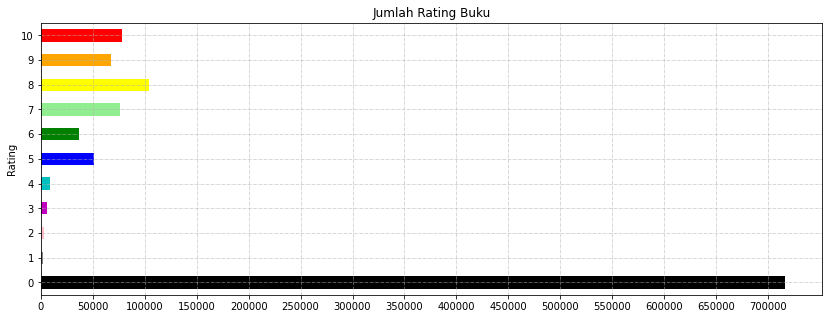

In [13]:
df_r['Book-Rating'].value_counts().sort_index().plot(
    kind    = 'barh',
    color   = ['k', 'gray', 'pink', 'm', 'c', 'b', 'g', 'lightgreen', 'yellow', 'orange', 'r'],
    title   = 'Jumlah Rating Buku',
    xlabel  = 'Rating',
    ylabel  = 'Jumlah',
    figsize = (14, 5),
    xticks  = (np.arange(0, 720000, 50000))
).grid(linestyle='-.', linewidth=0.5)

Berdasarkan hasil visualisasi grafik histogram "Jumlah Rating Buku" di atas, dapat disimpulkan bahwa *rating* terbanyak dari buku yang sudah pernah dibaca adalah *rating* 0, dengan jumlah *rating* kira-kira sebanyak lebih dari 700.000. *Rating* 0 tersebut dapat menyebabkan bias dan mempengaruhi hasil analisis, sehingga data dengan *rating* 0 tersebut dapat dihapus pada tahap *data preparation*.

### 3.2.3 *Dataset* User

*Exploratory Data Analysis* (EDA) untuk *dataframe* `Users`.

In [14]:
df_u

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


Berdasarkaan tabel *dataframe* `Users` di atas, dapat dilihat bahwa terdapat nilai `null` atau `NaN` (*Not a Number*) pada kolom/atribut `Age`. Sehingga perlu dilakukan pemrosesan lebih lanjut pada tahap *data preparation*.

In [15]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Deskripsi statistik untuk *dataframe* `Users`, seperti jumlah data (`count`), rata-rata (`mean`), simpangan baku/standar deviasi (`std`), nilai minimum (`min`), nilai maksimum (`max`), kuartil bawah/Q1 (`25%`), kuartil tengah/Q2/median (`50%`), dan kuartil atas/Q3 (`75%`).

In [16]:
df_u.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


# **4. *Data Preprocessing***

Tahap pra-pemrosesan data atau *data preprocessing* merupakan tahap yang perlu diterapkan sebelum melakukan proses pemodelan. Tahap ini adalah teknik yang digunakan untuk mengubah data mentah *(raw data*) menjadi data yang bersih (*clean data*) yang siap untuk digunakan pada proses selanjutnya. Dalam kasus ini, tahap *data preprocessing* dilakukan dengan menyesuaikan nama kolom atau atribut masing-masing *dataframe*, melakukan penggabungkan data ISBN, dan data *User* untuk melihat jumlah data secara keseluruhan.

## 4.1 Mengubah Nama Kolom/Atribut

Tujuan dari proses pengubahan nama kolom atau artibut dari masing-masing *dataframe* dengan menggunakan fungsi `.rename()` adalah untuk memudahkan proses pemanggilan *dataframe* dengan nama kolom atau atribut tertentu pada tahap selanjutnya.

### 4.1.1 Books

In [17]:
df_b.rename(columns={
    'ISBN'                : 'isbn',
    'Book-Title'          : 'book_title',
    'Book-Author'         : 'book_author',
    'Year-Of-Publication' : 'pub_year',
    'Publisher'           : 'publisher',
    'Image-URL-S'         : 'image_s_url',
    'Image-URL-M'         : 'image_m_url',
    'Image-URL-L'         : 'image_l_url'
}, inplace=True)

df_b

,isbn,book_title,book_author,pub_year,publisher,image_s_url,image_m_url,image_l_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


### 4.1.2 Ratings

In [18]:
df_r.rename(columns={
    'User-ID'     : 'user_id',
    'ISBN'        : 'isbn',
    'Book-Rating' : 'book_rating'
}, inplace=True)

df_r

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


### 4.1.3 Users

In [19]:
df_u.rename(columns={
    'User-ID'  : 'user_id',
    'Location' : 'location',
    'Age'      : 'age'
}, inplace=True)

df_u

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


## 4.2 Menggabungkan Data ISBN

Penggabungan data ISBN buku dilakukan menggunakan fungsi `.concatenate` dengan bantuan *library* [`numpy`](https://numpy.org). Data ISBN terdapat pada *dataframe* buku (`df_b`) dan *dataframe* *rating* (`df_r`), sehingga dilakukan penggabungan data tersebut pada atribut atau kolom `isbn`.

In [20]:
ISBNAll = np.concatenate((
    df_b.isbn.unique(),
    df_r.isbn.unique()
))

ISBNAll = np.sort(np.unique(ISBNAll))

print(f'Jumlah Buku berdasarkan ISBN : {len(ISBNAll)}')

Jumlah Buku berdasarkan ISBN : 341765


## 4.3 Menggabungkan Data *User*

Penggabungan data `user_id` buku dilakukan menggunakan fungsi `.concatenate` dengan bantuan *library* [`numpy`](https://numpy.org). Data `user_id` terdapat pada *dataframe* *rating* (`df_r`) dan *dataframe* *user* (`df_u`), sehingga dilakukan penggabungan data tersebut pada atribut atau kolom `user_id`.

In [21]:
UserAll = np.concatenate((
    df_r.user_id.unique(),
    df_u.user_id.unique()
))

UserAll = np.sort(np.unique(UserAll))

print(f'Jumlah Buku berdasarkan ISBN : {len(UserAll)}')

Jumlah Buku berdasarkan ISBN : 278858


# **5. *Data Preparation***

Tahap persiapan data atau *data preparation* juga merupakan tahapan penting sebelum memasuki proses pengembangan model machine learning. Pada tahap ini, dilakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan nantinya. Dalam kasus ini, tahap *data preparation* dilakukan dengan mengatasi *missing value*, pengecekan data duplikat, dan penggabungan data buku dan data *rating*.

## 5.1 *Pengecekan* *Missing Value*

Proses pengecekan missing value pada *dataframe* dapat dilakukan dengan menggunakan fungsi `.isnull().sum()`, sehingga diperoleh total jumlah data yang kosong atau hilang (*missing*).

### 5.1.1 Books

In [22]:
books = df_b
books.isnull().sum()

isbn           0
book_title     0
book_author    1
pub_year       0
publisher      2
image_s_url    0
image_m_url    0
image_l_url    3
dtype: int64

Berdasarkan deskripsi di atas, dapat dilihat bahwa pada *dataframe* `books` terdapat atribut yang memiliki nilai kosong atau *null*, yaitu pada atribut `book_author` sebanyak 1 data, `publisher` sebanayk 2 data, dan `image_l_url` sebanyak 3 data.

Dengan begitu, data yang kosong tersebut dapat dihapus atau di-*drop* dengan menggunakan fungsi `.dropna()`. Sehingga jika dilakukan pengecekan kembali maka sudah tidak ditemukan data yang kosong atau *null*.

In [23]:
books = books.dropna()
books.isnull().sum()

isbn           0
book_title     0
book_author    0
pub_year       0
publisher      0
image_s_url    0
image_m_url    0
image_l_url    0
dtype: int64

### 5.1.2 Ratings

In [24]:
ratings = df_r
ratings.isnull().sum()

user_id        0
isbn           0
book_rating    0
dtype: int64

Berdasarkan deskripsi di atas, dapat dilihat bahwa pada *dataframe* `ratings` tidak ditemukan adanya nilai kosong atau *null* di setiap atribut atau kolomnya.

Namun, pada tahap *Univariate Exploratory Data Analysis* (EDA) sebelumnya, dapat dilihat bahwa pada hasil visualisasi grafik histogram "Jumlah Rating Buku", sebagian besar data *rating* dari buku yang sudah pernah dibaca oleh *user* terdapat pada *rating* 0, dengan jumlah *rating* kira-kira sebanyak lebih dari 700.000. *Rating* tersebut dapat menyebabkan bias pada analisis data, sehingga data dengan *rating* 0 dapat dihapus.

In [25]:
print(f'Total Rating 0 : {ratings.book_rating.eq(0).sum()}')

ratings = ratings[df_r.book_rating > 0]

Total Rating 0 : 716109


Data dengan *rating* 0 ternyata sebanyak 716.109 data. Data tersebut tidak akan diikutsertakan ke dalam *dataframe*, sehingga data yang diambil adalah data *rating* yang lebih dari 0, yaitu *rating* 1 hingga *rating* 10 saja.

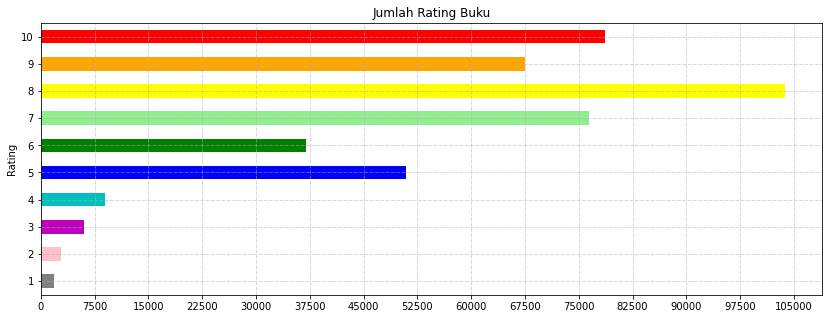

In [26]:
ratings.book_rating.value_counts().sort_index().plot(
    kind    = 'barh',
    color   = ['gray', 'pink', 'm', 'c', 'b', 'g', 'lightgreen', 'yellow', 'orange', 'r'],
    title   = 'Jumlah Rating Buku',
    xlabel  = 'Rating',
    ylabel  = 'Jumlah',
    figsize = (14, 5),
    xticks  = (np.arange(0, 110000, 7500))
).grid(linestyle='-.', linewidth=0.5)

Berdasarkan hasil visualisasi grafik histogram di atas dengan *rating* 0 yang telah dihapus, dapat dilihat distribusi frekuensi data yang lebih rapi dan jelas, terutama pada data *rating* 1 hingga *rating* 4.

### 5.1.3 Users

In [27]:
users = df_u
users.isnull().sum()

user_id          0
location         0
age         110762
dtype: int64

Berdasarkan deskripsi di atas, dapat dilihat bahwa pada *dataframe* `users` terdapat atribut yang memiliki nilai kosong atau *null*, yaitu pada atribut `age` sebanyak 110.762 data.

Dengan begitu, data yang kosong tersebut dapat diganti atau diisi dengan nilai modus atau nilai yang paling sering muncul dalam data `age` tersebut dengan menggunakan fungsi `.fillna()` dan fungsi ` .mode()`.

In [28]:
users.age = users.age.fillna(users.age.mode())
users.isnull().sum()

user_id          0
location         0
age         110761
dtype: int64

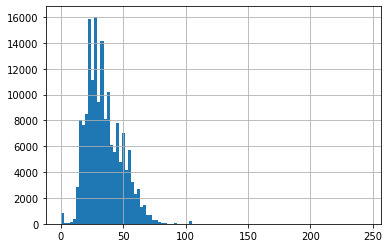

In [29]:
users.age.hist(bins=100)

Berdasarkan hasil visualisasi grafik histogram umur *user* di atas dapat dilihat bahwa rentang umur *user* paling banyak berada pada umur 20 hingga 30-an.

## 5.2 Pengecekan Data Duplikat

Melakukan pengecekan data yang duplikat atau data yang sama pada *dataframe* dapat dilakukan dengan menggunakan fungsi `.duplicated().sum()`.

In [30]:
print(f'Jumlah data books  yang duplikat: {books.duplicated().sum()}')
print(f'Jumlah data rating yang duplikat: {ratings.duplicated().sum()}')
print(f'Jumlah data users  yang duplikat: {users.duplicated().sum()}')

Jumlah data books  yang duplikat: 0
Jumlah data rating yang duplikat: 0
Jumlah data users  yang duplikat: 0


Berdasarkan data di atas, dapat dilihat bahwa tidak terdapat data buku, *rating*, dan *user* yang sama atau duplikat.

## 5.3 Data Buku dan *Rating*

In [31]:
books_ratings = pd.merge(ratings, books, on=['isbn'])
books_ratings

,user_id,isbn,book_rating,book_title,book_author,pub_year,publisher,image_s_url,image_m_url,image_l_url
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
...,...,...,...,...,...,...,...,...,...,...
383833,276688,0425156737,2,Graven Images,Jane Waterhouse,1997,Berkley Publishing Group,http://images.amazon.com/images/P/0425156737.0...,http://images.amazon.com/images/P/0425156737.0...,http://images.amazon.com/images/P/0425156737.0...
383834,276688,0671563149,6,MUDDY WATER (Peter Bartholomew Mysteries),Sally Gunning,1997,Pocket,http://images.amazon.com/images/P/0671563149.0...,http://images.amazon.com/images/P/0671563149.0...,http://images.amazon.com/images/P/0671563149.0...
383835,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
383836,276704,0380796155,5,White Abacus,Damien Broderick,1998,Eos,http://images.amazon.com/images/P/0380796155.0...,http://images.amazon.com/images/P/0380796155.0...,http://images.amazon.com/images/P/0380796155.0...


# **6. *Modeling***

Tahap selanjutnya adalah proses *modeling* atau membuat model *machine learning* yang dapat digunakan sebagai sistem rekomendasi untuk menentukan rekomendasi buku yang terbaik kepada pengguna dengan beberapa algoritma sistem rekomendasi tertentu.

Berdasarkan tahap pemahaman data atau data understanding sebelumnya, dapat dilihat bahwa data untuk masing-masing *dataframe*, yaitu data buku, *rating*, dan *users* tergolong data yang cukup banyak, mencapai ratusan hingga jutaan data. Hal tersebut akan berdampak pada biaya yang akan diperlukan untuk melakukan proses pemodelan *machine learning*, seperti memakan waktu yang lama dan *resource* RAM ataupu GPU yang cukup besar. Oleh karena itu, dalam kasus ini data yang akan digunakan untuk proses pemodelan *machine learning* data akan dibatasi hanya 10.000 baris data buku dan 5000 baris data *rating*.

In [32]:
books   = books[:10000]
ratings = ratings[:5000]

## 6.1 *Content-based Recommendation*

Sistem rekomendasi yang berbasis konten (*Content-based Recommendation*) adalah sistem rekomendasi yang merekomendasikan item yang mirip dengan item yang disukai pengguna di masa lalu. *Content-based filtering* akan mempelajari profil minat pengguna baru berdasarkan data dari objek yang telah dinilai pengguna.

### 6.1.1 TF-IDF Vectorizer

*Term Frequency Inverse Document Frequency Vectorizer* ([TF-IDF Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 'TfidfVectorizer - scikit-learn Documentation')) *Algorithm* merupakan algoritma yang dapat melakukan kalkulasi dan transformasi dari teks mentah menjadi representasi angka yang memiliki makna tertentu dalam bentuk matriks serta dapat digunakan dan dimengerti oleh model *machine learning*.

In [33]:
tfidf = TfidfVectorizer()
tfidf.fit(books.book_author)
# tfidf.get_feature_names_out()

TfidfVectorizer()

Proses transformasi data buku dengan atribut `book_author` ke dalam bentuk matriks dapat dilakukan dengan menggunakan fungsi `.fit_transform()`.

In [34]:
tfidf_matrix = tfidf.fit_transform(books.book_author)
tfidf_matrix.shape

(10000, 5575)

Ukuran matriks yang dihasilkan dari transformasi tersebut adalah 10.000 data buku dan 5.575 data *author*.

Data di atas masih dalam bentuk vektor (dari *vectorizer*), sehingga perlu diubah ke dalam bentuk matriks dengan menggunakan fungsi `.todense()`.

In [35]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Untuk dapat melihat matriks TF-IDF, matriks tersebut diubah terlebih dahulu menjadi sebuah *dataframe* dengan kolom adalah nama *author*, dan baris (*index*) merupakan judul buku.

In [36]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns = tfidf.get_feature_names_out(),
    index   = books.book_title
).sample(20, axis=1).sample(10, axis=0)

,heche,maples,singer,gene,cormac,gianfranco,phil,gladys,subrahmanian,kendrick,isabel,berlinski,mihaly,swick,mick,yastrow,tonke,hospital,mcquillan,parkinson
book_title,,,,,,,,,,,,,,,,,,,,
El Ultimo Judio (Punto de Lectura),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Sound and the Fury (Vintage International),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nowhere To Run,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
J Is for Judgment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Blackwood Farm (The Vampire Chronicles),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Blood Orchid (Holly Barker Novels (Hardcover)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dragonflight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Belinda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Summer Island,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6.1.2 *Cosine Similarity*

Untuk melakukan perhitungan derajat kesamaan (*similarity degree*) antar judul buku dapat dilakukan dengan teknik *cosine similarity* menggunakan fungsi [`cosine_similarity`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html 'cosine_similarity - scikit-learn Documentation') dari library `sklearn`.

In [37]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Dengan teknik yang sama, untuk melihat *array* *cosine similarity* dapat diubah terlebih dahulu menjadi sebuah *dataframe*.

In [39]:
cosine_sim_df = pd.DataFrame(
    cosine_sim,
    columns = books.book_title,
    index   = books.book_title
)

print(f'Cosine Similarity Shape : {cosine_sim_df.shape}')

cosine_sim_df.sample(8, axis=1).sample(8, axis=0)

Cosine Similarity Shape : (10000, 10000)


book_title,Having Our Say : The Delany Sisters' First 100 Years,So Many Books: Reading and Publishing in an Age of Abundance,La Ingratitud,Dollar Road: A Novel,Tanner on Ice: An Evan Tanner Novel (Tanner Mystery Series),A Monstrous Regiment of Women,Dreams of Dead Womens Handbags,True Singapore Ghost Stories : Book 8
book_title,,,,,,,,
Amerigo : RÃ?Â©cit d'une erreur historique,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
The Hobbit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
Mathematical Scandals,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
"GRADUATION (FINAL FRIENDS 3) : GRADUATION (Final Friends, No 3)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
And Then You Die,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
Fantastic Four Illustrated Books,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.39472
Fair Warning: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
Alaska by Cruise Ship: The Complete Guide to the Alaska Cruise Experience,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


### 6.1.3 Recommendation Testing

Mendefinisikan fungsi `author_recommendations` untuk menampilkan data buku yang direkomendasikan oleh algoritma sistem yang telah dibuat, dengan parameter masukan berupa judul buku yang sudah pernah dibaca oleh *user*.

In [40]:
def author_recommendations(book_title, similarity_data=cosine_sim_df, items=books[['book_title', 'book_author']], k=10):
    index = similarity_data.loc[:,book_title].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(book_title, errors='ignore')
    
    return pd.DataFrame(closest).merge(items).head(k)

In [41]:
readed_book_title = 'Proxies'

In [42]:
books[books.book_title.eq(readed_book_title)]

,isbn,book_title,book_author,pub_year,publisher,image_s_url,image_m_url,image_l_url
50,0812523873,Proxies,Laura J. Mixon,1999,Tor Books,http://images.amazon.com/images/P/0812523873.0...,http://images.amazon.com/images/P/0812523873.0...,http://images.amazon.com/images/P/0812523873.0...


Pada beberapa kasus, sistem rekomendasi akan memberikan rekomendasi buku yang terduplikat, sehingga perlu dilakukan penghapusan data judul buku rekomendasi yang terduplikat.

In [43]:
author_recommendations(readed_book_title).drop_duplicates()

,book_title,book_author
0,Lethal Lover (Dangerous Men) (Harlequin Intrig...,Laura Gordon
1,"Last Writes (Levine, Laura, Jaine Austen Myste...",Laura Levine
2,Diary of a Mad Mom-To-Be,Laura Wolf
3,Diary of a Mad Bride (Summer Display Opportunity),Laura Wolf
4,The Law of Love,Laura Esquivel
8,Like Water for Chocolate: A Novel in Monthly I...,Laura Esquivel
9,Like Water for Chocolate: A Novel in Monthly I...,Laura Esquivel


Dapat dilihat bahwa sistem yang telah dibangun berhasil memberikan rekomendasi beberapa judul buku berdasarkan input atau masukan sebuah judul buku, yaitu "Proxies", dan diperoleh beberapa judul buku yang berdasarkan perhitungan sistem.

## 6.2 *Collaborative Filtering Recommendation*

Sistem rekomendasi penyaringan kolaboratif (*Collaborative Filtering Recommendation*) adalah sistem rekomendasi yang merekomendasikan item yang mirip dengan preferensi pengguna di masa lalu, misalnya berdasarkan *rating* yang telah diberikan oleh pengguna di masa lalu.

### 6.2.1 *Data Preparation*

Melakukan penyandian (*encoding*) fitur `user_id` ke dalam indeks integer.

In [44]:
user_ids = ratings.user_id.unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [45]:
print(user_ids)
print(user_to_user_encoded)
print(user_encoded_to_user)

[276726, 276729, 276736, 276737, 276744, 276745, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276804, 276808, 276811, 276812, 276813, 276814, 276820, 276822, 276827, 276828, 276830, 276832, 276835, 276837, 276842, 276847, 276848, 276850, 276853, 276854, 276857, 276859, 276861, 276862, 276863, 276866, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276949, 276953, 276954, 276957, 276959, 276964, 276965, 276984, 276986, 276988, 276990, 276992, 276994, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277023, 277028, 277031, 277032, 277036, 277042, 277048, 277051, 277052, 277053, 277056, 277058, 277065, 277072, 277074, 277079, 277085, 277087, 277090, 277094, 277096, 277107, 277109, 277116, 277124, 277128, 277129, 277134, 277135, 277139, 277143, 277157, 277159, 277165,

Melakukan penyandian (*encoding*) fitur `isbn` buku ke dalam indeks integer.

In [46]:
book_ids = ratings.isbn.unique().tolist()
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

In [47]:
print(book_ids)
print(book_to_book_encoded)
print(book_encoded_to_book)

['0155061224', '052165615X', '0521795028', '3257224281', '0600570967', '038550120X', '342310538', '0060517794', '0671537458', '0679776818', '0943066433', '1885408226', '0747558167', '3596218098', '0684867621', '0451166892', '8440682697', '0380711524', '3453092007', '3453213025', 'N3453124715', '9057868059', '0553572369', '3499230933', '3596151465', '3442136644', '8484330478', '8484332039', '2864322102', '8437606322', '8466300821', '8478442588', '0345443683', '043935806X', '055310666X', '0330332775', '0006379702', '3442131340', '3548603203', '1562827898', '0440498058', '0395547032', '0440414121', '8879839993', '8423996565', '8426449476', '8426449573', '8478884831', '8478885218', '8478885463', '8478886044', '0091830893', '0586207414', '0812571029', '0140260498', '0060096195', '0141310340', '0142302198', '0156006065', '0375821813', '038076041X', '0439401399', '0552546933', '0689804458', '0699854289', '0786812508', '0786817070', '0805057706', '1551925060', '1573248533', '000651118X', '2253

Memetakan `user_id` dan `isbn` ke dalam masing-masing *dataframe* yang berkaitan.

In [48]:
ratings['user'] = ratings.user_id.map(user_to_user_encoded)
ratings['book'] = ratings.isbn.map(book_to_book_encoded)

Melakukan pengecekan jumlah *user*, jumlah buku, dan *rating* minimal serta *rating* maksimal.

In [49]:
num_users = len(user_encoded_to_user)
num_books = len(book_encoded_to_book)
print(num_users)
print(num_books)

min_ratings = min(ratings.book_rating)
max_ratings = max(ratings.book_rating)
print(f'Number of User: {num_users}, Number of Books: {num_books}, Min Rating: {min_ratings}, Max Rating: {max_ratings}')

1204
4565
Number of User: 1204, Number of Books: 4565, Min Rating: 1, Max Rating: 10


### 6.2.2 *Training Data and Validation Data Split*

Melakukan pengecekan terdahap *dataframe* `ratings` yang telah dilakukan pemetaan atribut atau kolom tambahan, yaitu `user` dan `book`. Selain itu, dilakukan juga pengacakan data dengan menggunakan fungsi [`.sample(frac=1)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html 'pandas.DataFrame.sample - Pandas Documentation').

In [50]:
ratings = ratings.sample(frac=1, random_state=412)
ratings

,user_id,isbn,book_rating,user,book
1554,277427,0375408886,9,200,681
1465,277427,0060542128,7,200,666
9656,81,0375410538,5,649,2307
4153,278257,0060194596,9,462,1728
4324,278411,0446608831,8,500,1825
...,...,...,...,...,...
820,277051,0385720920,10,98,380
629,276939,2253063339,9,70,269
12371,1167,038533656X,5,941,3478
2120,277478,0451459393,8,215,855


Melakukan pembagian *dataset* dengan rasio 80:20, yaitu 80% untuk data latih (*training data*) dan 20% untuk data uji (*validation data*).

In [51]:
x = ratings[['user', 'book']].values
y = ratings['book_rating'].apply(lambda x: (x-min_ratings) / (max_ratings-min_ratings)).values

train_indices = int(0.8 * ratings.shape[0])

xTrain, xVal, yTrain, yVal = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 200  681]
 [ 200  666]
 [ 649 2307]
 ...
 [ 941 3478]
 [ 215  855]
 [1012 3676]] [0.88888889 0.66666667 0.44444444 ... 0.44444444 0.77777778 0.77777778]


### 6.2.3 *Model Development and Training*

Pada tahap pembuatan model akan menggunakan kelas `RecommenderNet` dengan [*keras model class*](https://keras.io/api/models/model 'Model class - Keras Documentation').

In [52]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_books, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_books = num_books
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.user_bias      = layers.Embedding(num_users, 1)
        self.book_embedding = layers.Embedding(
            num_books,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.book_bias = layers.Embedding(num_books, 1)
    
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:,0])
        user_bias   = self.user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias   = self.book_bias(inputs[:, 1])
        
        dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
        
        x = dot_user_book + user_bias + book_bias
        
        return tf.nn.sigmoid(x)

Kemudian pada proses *model compiling*, akan menggunakan [Adam optimizer](https://keras.io/api/optimizers/adam 'Adam - Keras Documentation'), [binary crossentropy loss function](https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class 'BinaryCrossentropy - Keras Documentaion'), dan metrik [RMSE](https://keras.io/api/metrics/regression_metrics/#rootmeansquarederror-class 'RootMeanSquaredError - Keras Documentation') (Root Mean Squared Error).

In [53]:
model = RecommenderNet(num_users, num_books, 50)

model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss      = BinaryCrossentropy(),
    metrics   = [RootMeanSquaredError()]
)

Pelatihan model atau model *training* dengan menggunakan fungsi `.fit()` dengan parameter `batch_size` sebesar 20, dan 30 `epochs`.

In [54]:
history = model.fit(
    x               = xTrain,
    y               = yTrain,
    batch_size      = 20,
    epochs          = 30,
    validation_data = (xVal, yVal),
)

Epoch 1/30
200/200 [==============================] - 3s 8ms/step - loss: 0.6895 - root_mean_squared_error: 0.3096 - val_loss: 0.6842 - val_root_mean_squared_error: 0.2979
Epoch 2/30
200/200 [==============================] - 1s 5ms/step - loss: 0.6037 - root_mean_squared_error: 0.2320 - val_loss: 0.6775 - val_root_mean_squared_error: 0.2921
Epoch 3/30
200/200 [==============================] - 1s 5ms/step - loss: 0.5712 - root_mean_squared_error: 0.1992 - val_loss: 0.6767 - val_root_mean_squared_error: 0.2914
Epoch 4/30
200/200 [==============================] - 1s 5ms/step - loss: 0.5670 - root_mean_squared_error: 0.1948 - val_loss: 0.6753 - val_root_mean_squared_error: 0.2903
Epoch 5/30
200/200 [==============================] - 1s 6ms/step - loss: 0.5631 - root_mean_squared_error: 0.1910 - val_loss: 0.6740 - val_root_mean_squared_error: 0.2892
Epoch 6/30
200/200 [==============================] - 1s 5ms/step - loss: 0.5590 - root_mean_squared_error: 0.1866 - val_loss: 0.6731 - val_

Melakukan visualisasi hasil *training* dan *validation* *error* serta *training* dan *validation* *loss* ke dalam grafik plot dengan bantuan *library* [`matplotlib`](https://matplotlib.org 'Matplotlib - Visualization with Python').

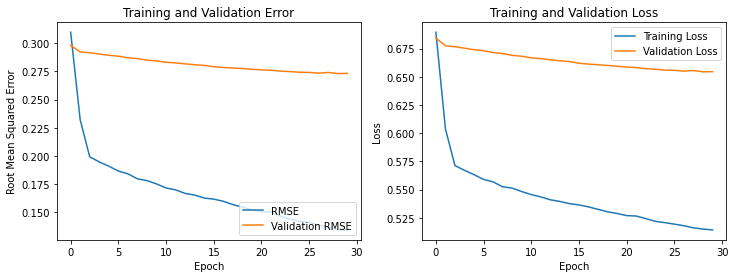

In [55]:
rmse     = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss     = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(rmse,     label='RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.title('Training and Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(loss,     label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

## 6.2.4 *Get Recommendation Testing*

Melakukan pendefinisian ulang *dataset* *books* dan *ratings*.

In [56]:
datasetBook   = books
datasetRating = ratings

Untuk mendapatkan rekomendasi buku yang akan dihasilkan oleh sistem, diperlukan sebuah data atau sampel dari pengguna secara acak dan mendefinisikan variabel buku yang belum pernah dibaca oleh pengguna (`notReadedBooks`) yang merupakan daftar resto yang nantinya akan direkomendasikan. Daftar tersebut dapat didapatkan dengan menggunakan operator logika bitwise ([`~`](https://docs.python.org/3/reference/expressions.html#unary-arithmetic-and-bitwise-operations 'Unary Arithmetic and Bitwise Operations - Python Documentation')) pada variabel buku yang telah dibaca oleh pengguna (`readedBooks`).

In [81]:
userId      = datasetRating.user_id.sample(1).iloc[0]
readedBooks = datasetRating[datasetRating.user_id == userId]

notReadedBooks = datasetBook[~datasetBook['isbn'].isin(readedBooks.isbn.values)]['isbn'] 
notReadedBooks = list(
    set(notReadedBooks).intersection(set(book_to_book_encoded.keys()))
)

notReadedBooks = [[book_to_book_encoded.get(x)] for x in notReadedBooks]
userEncoder    = user_to_user_encoded.get(userId)
userBookArray = np.hstack(
    ([[userEncoder]] * len(notReadedBooks), notReadedBooks)
)

Untuk mendapatkan hasil rekomendasi buku yang akan diberikan oleh sistem, dapat menggunakan fungsi [`.predict()`](https://keras.io/api/models/model 'Model class - Keras Documentation') dari *library* Keras.

In [82]:
ratings = model.predict(userBookArray).flatten()

topRatingsIndices   = ratings.argsort()[-10:][::-1]
recommendedBookIds = [
    book_encoded_to_book.get(notReadedBooks[x][0]) for x in topRatingsIndices
]

print('Showing recommendations for users: {}'.format(userId))
print('=====' * 8)
print('Book with high ratings from user')
print('-----' * 8)

topBookUser = (
    readedBooks.sort_values(
        by = 'book_rating',
        ascending=False
    )
    .head(5)
    .isbn.values
)

bookDfRows = datasetBook[datasetBook['isbn'].isin(topBookUser)]
for row in bookDfRows.itertuples():
    print(row.book_title, ':', row.book_author)

print('=====' * 8)
print('Top 10 Books Recommendation')
print('-----' * 8)

recommended_resto = datasetBook[datasetBook['isbn'].isin(recommendedBookIds)]
for row in recommended_resto.itertuples():
    print(row.book_title, ':', row.book_author)

Showing recommendations for users: 388
Book with high ratings from user
----------------------------------------
Impossible Vacation : Spalding Gray
Life Before Man : Margaret Atwood
Cavedweller : Dorothy Allison
The Robber Bride : Margaret Atwood
The House of Mirth (Library of America) : Edith Wharton
Top 10 Books Recommendation
----------------------------------------
To Kill a Mockingbird : Harper Lee
The Secret Life of Bees : Sue Monk Kidd
The Bean Trees : Barbara Kingsolver
Life of Pi : Yann Martel
The Grapes of Wrath: John Steinbeck Centennial Edition (1902-2002) : John Steinbeck
A Walk in the Woods: Rediscovering America on the Appalachian Trail (Official Guides to the Appalachian Trail) : Bill Bryson
The Handmaid's Tale : Margaret Atwood
The Visitor (Animorphs, No 2) : K. A. Applegate
The King of Torts : JOHN GRISHAM
The Watsons Go to Birmingham - 1963 (Yearling Newbery) : CHRISTOPHER PAUL CURTIS


Berdasarkan hasil di atas, dapat dilihat bahwa sistem akan mengambil pengguna secara acak, yaitu pengguna dengan `user_id` **388**. Lalu akan dicari buku dengan rating terbaik dari user tersebut, yaitu,
*   **Impossible Vacation** oleh **Connie Willis**
*   **Life Before Man** oleh **Margaret Atwood**
*   **Cavedweller** oleh **Dorothy Allison**
*   **The Robber Bride** oleh **Margaret Atwood**
*   **The House of Mirth (Library of America)** oleh **Edith Wharton**

Kemudian sistem akan membandingan antara buku dengan rating tertinggi dari user dan semua buku, kecuali buku yang telah dibaca tersebut, lalu akan mengurutkan buku yang akan direkomendasikan berdasarkan nilai rekomendasi yang tertinggi. Dapat dilihat terdapat 10 daftar buku yang direkomendasikan oleh sistem.

Dapat dibandingkan antara ***Book with high ratings from user*** dan ***Top 10 Books Recommendation***, terdapat buku dengan penulis atau author yang sama, yaitu **The Handmaid's Tale** oleh **Margaret Atwood**. Dengan begitu, dapat dikatakan bahwa sistem yang telah dibangun dapat merekomendasikan buku kepada pengguna dengan prediksi yang cukup sesuai.

# **7. Kesimpulan**

Kesimpulannya adalah model yang digunakan untuk melakukan rekomendasi buku berdasarkan teknik *Content-based Recommendation* dan teknik *Collaborative Filtering Recommendation* telah berhasil dibuat dan sesuai dengan preferensi pengguna. Pada *collaborative filtering* diperlukan data rating dari pengguna, sedangkan pada *content-based filtering*, data rating tidak diperlukan karena analisis sistem rekomendasi akan berdasarkan atribut item dari masing-masing buku.